In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = 'simon_task.txt'  # Passe den Dateinamen an

# Datei einlesen und in ein DataFrame umwandeln
data = pd.read_csv(file_path, sep="\t", header=None, names=["trial", "side", "response", "condition", "block", "reaction_time"])

In [3]:
compatible_data = data[data['condition'] == 'compatible']
incompatible_data = data[data['condition'] == 'incompatible']
compatible_data
incompatible_data

,trial,side,response,condition,block,reaction_time
1,2,right,leftresponse,incompatible,1,766
3,2,right,leftresponse,incompatible,1,597
7,2,right,leftresponse,incompatible,1,874
9,2,right,leftresponse,incompatible,1,465
10,4,left,rightresponse,incompatible,1,869
...,...,...,...,...,...,...
173,2,right,leftresponse,incompatible,2,491
175,2,right,leftresponse,incompatible,1,513
176,2,right,leftresponse,incompatible,1,469
178,4,left,rightresponse,incompatible,2,624


In [4]:
compatible_mean = compatible_data['reaction_time'].mean()
compatible_std = compatible_data['reaction_time'].std()

incompatible_mean = incompatible_data['reaction_time'].mean()
incompatible_std = incompatible_data['reaction_time'].std()

print(f"Compatible - Mittelwert: {compatible_mean}, Standardabweichung: {compatible_std}")
print(f"Incompatible - Mittelwert: {incompatible_mean}, Standardabweichung: {incompatible_std}")


Compatible - Mittelwert: 640.7065217391304, Standardabweichung: 225.5221310766444
Incompatible - Mittelwert: 647.4204545454545, Standardabweichung: 141.88798573643484


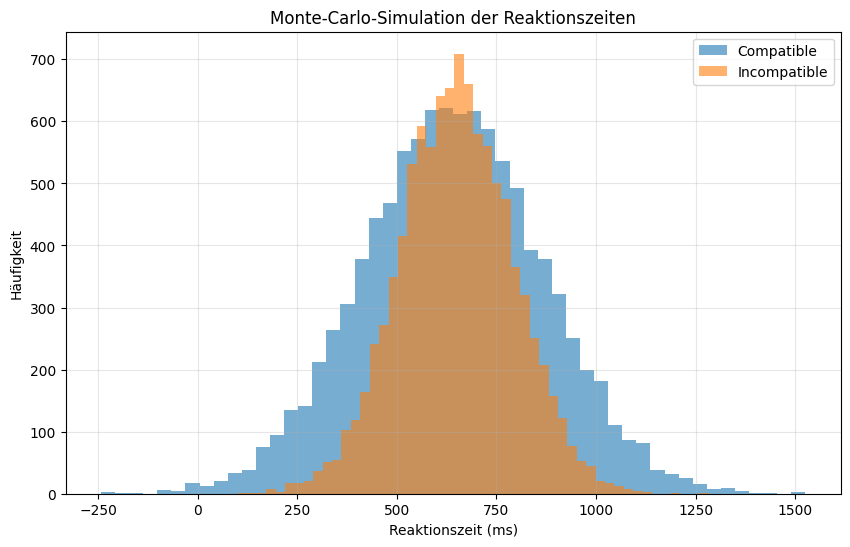

In [5]:
n_simulationen = 10000

# Simulation für jede Bedingung
np.random.seed(42)
compatible_reactions = np.random.normal(compatible_mean, compatible_std, n_simulationen)
incompatible_reactions = np.random.normal(incompatible_mean, incompatible_std, n_simulationen)

# Ergebnisse kombinieren und visualisieren
plt.figure(figsize=(10, 6))
plt.hist(compatible_reactions, bins=50, alpha=0.6, label='Compatible')
plt.hist(incompatible_reactions, bins=50, alpha=0.6, label='Incompatible')
plt.title('Monte-Carlo-Simulation der Reaktionszeiten')
plt.xlabel('Reaktionszeit (ms)')
plt.ylabel('Häufigkeit')
plt.legend()
plt.grid(alpha=0.3)
plt.show()